# Khai báo thư viện

In [2]:
import random

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns

from skimage.feature import hog

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

from imutils import paths
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'imutils'

# Lấy dữ liệu

In [4]:
from imutils import paths
image_dir_paths = list(paths.list_images(r"C:\Users\Admin\Downloads\Data_face\Full_Dataset"))

image_dir_paths

ModuleNotFoundError: No module named 'imutils'

In [3]:
Dataset_dir = r"C:/Users/Admin/Downloads/Data_face/Full_Dataset/"

In [4]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
        print(label, 'Completed')

    return image_paths, labels

In [5]:
dataset = pd.DataFrame()
dataset['image'], dataset['label'] = load_dataset(Dataset_dir)
#shuffle the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:/Users/Admin/Downloads/Data_face/Full_Datase...,sad
1,C:/Users/Admin/Downloads/Data_face/Full_Datase...,neutral
2,C:/Users/Admin/Downloads/Data_face/Full_Datase...,surprise
3,C:/Users/Admin/Downloads/Data_face/Full_Datase...,surprise
4,C:/Users/Admin/Downloads/Data_face/Full_Datase...,neutral


In [6]:
dataset.groupby('label').count()

,image
label,
angry,4000
disgust,4000
fear,4000
happy,4000
neutral,4000
sad,4000
surprise,4000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   28000 non-null  object
 1   label   28000 non-null  object
dtypes: object(2)
memory usage: 437.6+ KB


In [8]:
dataset.describe()

,image,label
count,28000,28000
unique,28000,7
top,C:/Users/Admin/Downloads/Data_face/Full_Datase...,sad
freq,1,4000


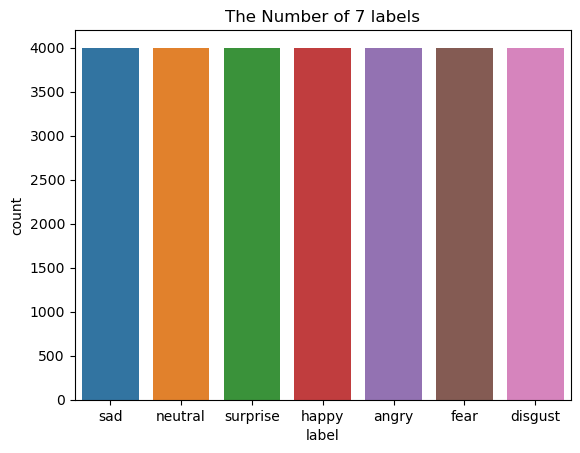

In [9]:
sns.countplot(x = 'label', data = dataset);
plt.title('The Number of 7 labels')
plt.show()

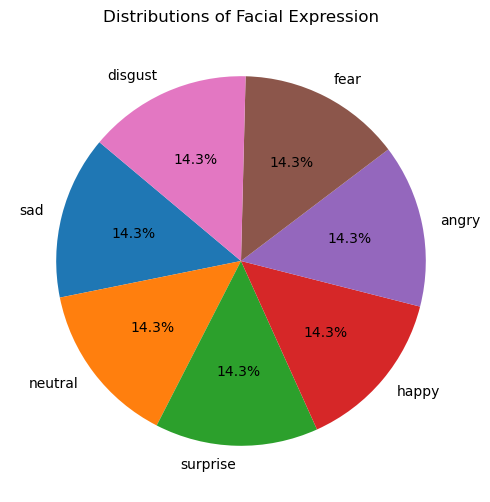

In [10]:
emotion_counts = dataset['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distributions of Facial Expression')
plt.show()

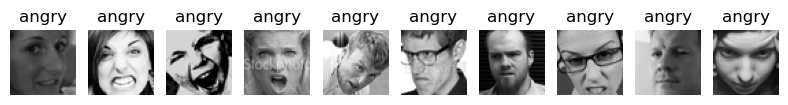

In [11]:
import os
fig = plt.figure(figsize=(20,20))

for i in range(10):

    fig.add_subplot(1, 20, i + 1)
    plt.imshow(np.array(cv2.imread(image_dir_paths[i])), cmap='gray')
    label = image_dir_paths[i].split(os.path.sep)[-2]
    plt.title(label)
    plt.axis('off')
plt.show()

# Trích xuất đặc trưng

In [12]:
from tqdm import tqdm
def image_to_gray(images):
    image = cv2.imread(images)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgray

def resize_image(images, size):
    return cv2.resize(images, (size, size))

def extract_features(imagePaths):

    features = []
    labels = []

    for imagePath in tqdm(imagePaths):
        im = image_to_gray(imagePath)
        im = resize_image(im, 64)
        fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)
        features.append(fd1)

    features = np.array(features)
    labels = np.array(labels)
    return features,labels



In [13]:
features, labels = extract_features(image_dir_paths)

print('[INFO] The number of features ...' + str(features.shape[1]))

print('[INFO] The number of samples ...'  + str(labels.shape[0]))

100%|██████████| 28000/28000 [00:44<00:00, 625.89it/s]


[INFO] The number of features ...2800
[INFO] The number of samples ...28000


# Tuning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

#define parameter range
par_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

grid1 = GridSearchCV(SVC(), par_grid, refit = True, verbose = 3)

grid1.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.146 total time=16.4min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.146 total time=15.5min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.146 total time=15.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.146 total time=13.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.146 total time=12.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.432 total time=10.7min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.423 total time=10.6min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.430 total time=10.7min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.435 total time=11.0min


In [ ]:
from sklearn.model_selection import GridSearchCV

par_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  
    'degree': [2, 3, 4],  
    'coef0': [0, 1, 10], 
    'kernel': ['poly']
}

grid4 = GridSearchCV(SVC(), par_grid, refit=True, verbose=3)

grid4.fit(X_train, y_train)

# Training Model và đánh giá hiệu suất

In [6]:
svm_clf = SVC(kernel='rbf', gamma='scale', C = 10)

In [28]:
svm_clf_poly = SVC(kernel='poly', C=10, degree=3, gamma='scale', coef0=0.0)

In [14]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


R = random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3, random_state=R)

print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))


[INFO] The number of images used in training ...19600
[INFO] The number of images used in testing ...8400


In [15]:
X_train

array([[0.00706547, 0.0089725 , 0.        , ..., 0.01484996, 0.02887842,
        0.07367837],
       [0.09774172, 0.02669901, 0.00294662, ..., 0.00249609, 0.00672644,
        0.00988708],
       [0.16270084, 0.08126522, 0.02398381, ..., 0.23003319, 0.25463475,
        0.09480854],
       ...,
       [0.01965144, 0.00822622, 0.00426641, ..., 0.02862047, 0.00497164,
        0.0977333 ],
       [0.01590886, 0.00993359, 0.02026835, ..., 0.        , 0.01804597,
        0.02216727],
       [0.01184041, 0.02066257, 0.02974716, ..., 0.11522351, 0.07572202,
        0.13064521]])

In [16]:
y_train

array(['disgust', 'sad', 'disgust', ..., 'disgust', 'disgust', 'sad'],
      dtype='<U8')

In [29]:
svm_clf_poly.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [17]:
svm_clf.fit(X_train, y_train) 

SVC(C=10)

In [18]:
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.83%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00      2769
     disgust       1.00      1.00      1.00      2829
        fear       1.00      0.99      1.00      2758
       happy       1.00      1.00      1.00      2844
     neutral       1.00      1.00      1.00      2777
         sad       1.00      1.00      1.00      2826
    surprise       1.00      1.00      1.00      2797

    accuracy                           1.00     19600
   macro avg       1.00      1.00      1.00     19600
weighted avg       1.00      1.00      1.00     19600

_______________________________________________
Confusion Matrix: 
 [[2767    1    0    0    0    1    0]
 [   0 2828    0    0    0    0    1]
 [   3    1 2743    0    0    6    5]
 [   0    0    0 2840    0    0    4]
 [   2    0    0    1 2774    0    0]
 [   1    0    3    0    0 2822    0]

In [30]:
print_score(svm_clf_poly, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf_poly, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00      2810
     disgust       1.00      1.00      1.00      2826
        fear       1.00      1.00      1.00      2806
       happy       1.00      1.00      1.00      2783
     neutral       1.00      1.00      1.00      2768
         sad       1.00      1.00      1.00      2800
    surprise       1.00      1.00      1.00      2807

    accuracy                           1.00     19600
   macro avg       1.00      1.00      1.00     19600
weighted avg       1.00      1.00      1.00     19600

_______________________________________________
Confusion Matrix: 
 [[2805    1    0    0    1    3    0]
 [   0 2824    0    0    0    0    2]
 [   1    0 2797    0    1    3    4]
 [   0    0    0 2781    0    0    2]
 [   1    0    1    0 2766    0    0]
 [   2    0    0    0    0 2798    0]

## So sánh RBF Kernel và Poly Kernel
* Accuracy Train: 99.83%(rbf) và 99.87%(poly)
* Accuracy Test: 61.29%(rbf) và 58.71%(poly)

Mô hình sử dụng RBF kernel có độ chính xác trên tập kiểm thử là 61.29%, trong khi đó mô hình sử dụng Poly kernel có độ chính xác là 58.71%. Dù sự khác biệt không lớn, nhưng dựa trên con số này, có thể kết luận rằng RBF kernel nhỉnh hơn một chút so với Poly kernel trong bài toán ứng dụng cụ thể như trên.

Điều này có thể được diễn giải như sau:

-- **Khả Năng Tổng Quát Hóa Tốt**: RBF có khả năng tổng quát hóa tốt trong nhiều bài toán học máy, đặc biệt là trong các bài toán có dữ liệu phi tuyến tính phức tạp. RBF có thể tạo ra các quyết định phức tạp hơn và thích ứng tốt với sự phân bố không gian của dữ liệu.

-- **Ít Tham Số Cần Điều Chỉnh**: Khi sử dụng kernel RBF, chúng ta thường chỉ cần điều chỉnh một số ít tham số (chẳng hạn như gamma và C). Trong khi đó, Polynomial kernel thường yêu cầu điều chỉnh thêm các tham số (như degree, coef0), có thể khiến việc tinh chỉnh mô hình trở nên phức tạp hơn.

-- **Khả Năng Xử Lý Dữ Liệu Phi Tuyến Tính**: Trong phân loại cảm xúc trên khuôn mặt, dữ liệu thường có tính chất phi tuyến tính cao do đa dạng của các biểu hiện cảm xúc. RBF được đánh giá cao trong việc xử lý dữ liệu phi tuyến tính.

-- **Hiệu Suất Tốt trong Nhiều Tình Huống**: Trong thực tế, kernel RBF thường cho kết quả tốt trong nhiều tình huống khác nhau mà không cần quá nhiều công sức để tinh chỉnh tham số, làm cho nó trở thành lựa chọn ưa thích trong nhiều ứng dụng, bao gồm cả nhận diện cảm xúc.

=> Tóm lại, dựa trên kết quả cụ thể như trên, có thể nhận định rằng RBF kernel nhỉnh hơn một chút so với Poly kernel, nhưng sự khác biệt không quá lớn.

# Ứng dụng mô hình RBF Kernel
### Ảnh tĩnh

In [ ]:
predicted = svm_clf.predict(X_test)

The facial expression is sad


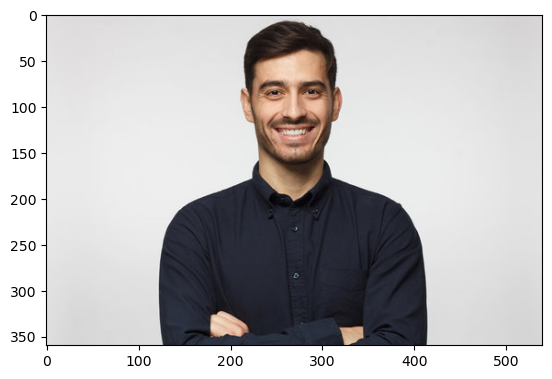

In [37]:
def image_to_gray(images):
    image = cv2.imread(images)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgray

def resize_image(images, size):
    return cv2.resize(images, (size, size))

def extract_feature_test(image_test):
    im = image_to_gray(image_test)
    im = resize_image(im, 64)
    fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

    return fd1


test_image = r"C:\Users\Admin\Downloads\smileguy.jpg"

test_image_feature = extract_feature_test(test_image)

predicted_emotion = load_model.predict([test_image_feature])[0]

from PIL import Image
img = Image.open(test_image)
plt.imshow(img, cmap='gray')
print(f'The facial expression is {predicted_emotion}')

Kết quả dự đoán đối với image trên là:sad (một dự đoán sai ta có thể thấy rõ)

Đối với một bức ảnh rõ như trên mà mô hình lại dự đoán sai. Vậy điều khiến cho mô hình trên dự đoán chưa đúng có thể do:
* Độ chính xác của mô hình chưa cao
* Bức ảnh chưa đúng vào trọng tâm khuôn mặt

Vậy để thử xem là vì lý do gì thì trước hết ta sẽ lấy ra khuôn mặt đúng trọng tâm cho rõ rồi sẽ tiếp tục dự đoán để xem kết quả ra gì.

In [38]:
import cv2
frame = cv2.imread(r"C:\Users\Admin\Downloads\smileguy.jpg")

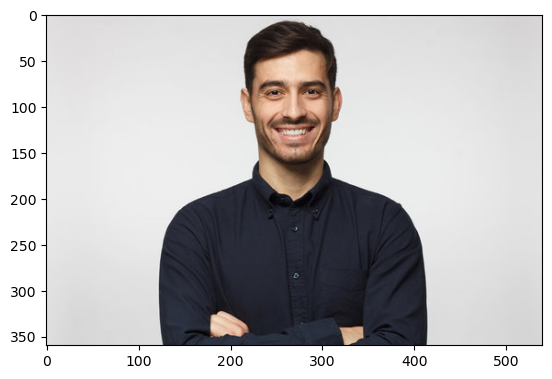

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB));

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(360, 540)

In [43]:
frame.shape

(360, 540, 3)

In [44]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) #1
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex: ex+ew]

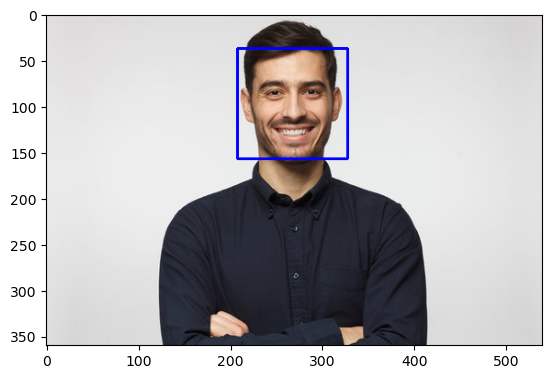

In [45]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB));

In [46]:
face_roi

array([[[ 27,  29,  39],
        [ 26,  30,  35],
        [ 19,  24,  27],
        ...,
        [163, 162, 164],
        [214, 214, 214],
        [224, 224, 224]],

       [[ 28,  31,  36],
        [ 23,  26,  31],
        [ 25,  28,  32],
        ...,
        [117, 120, 125],
        [214, 217, 221],
        [222, 224, 225]],

       [[ 29,  32,  37],
        [ 24,  27,  32],
        [ 26,  29,  33],
        ...,
        [ 69,  72,  77],
        [180, 183, 187],
        [223, 225, 226]],

       ...,

       [[235, 236, 234],
        [235, 236, 234],
        [235, 236, 234],
        ...,
        [234, 235, 233],
        [234, 235, 233],
        [234, 235, 233]],

       [[235, 236, 234],
        [235, 236, 234],
        [235, 236, 234],
        ...,
        [234, 235, 233],
        [234, 235, 233],
        [234, 235, 233]],

       [[235, 236, 234],
        [235, 236, 234],
        [235, 236, 234],
        ...,
        [234, 235, 233],
        [234, 235, 233],
        [234, 235, 233]]

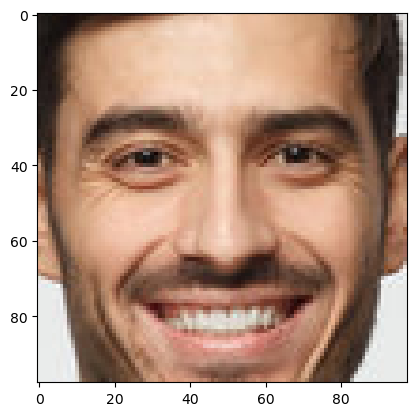

In [47]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [48]:
final_image = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)

'happy'

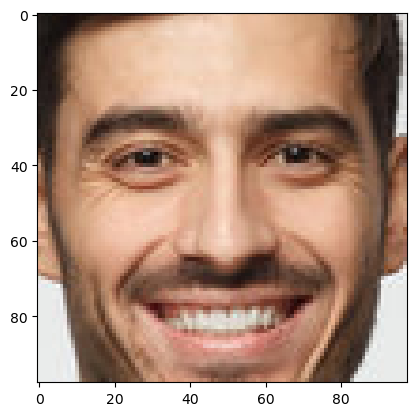

In [49]:
def resize_image(images, size):
    return cv2.resize(images, (size, size))

def extract_feature_final(image_test):
    im = resize_image(image_test, 64)
    fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

    return fd1

final_image = extract_feature_final(final_image)

# Now predict using the SVM classifier
Prediction = load_model.predict([final_image])[0]
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
Prediction

* Và sau khi chúng ta dự đoán với một hình ảnh đúng với trọng tâm khuôn mặt thì ra một kết quả chính xác ứng với bức ảnh trên đó là happy.
* Bởi tập dữ liệu chỉ có các khuôn mặt đúng trọng tâm nên việc lấy ra được khuôn mặt đối với một bức ảnh có kích thước lớn mà khuôn mặt trở nên nhỏ so với bối cảnh là việc rất quan trọng.
* Như vậy để cho việc dự đoán được chính xác hơn thì ta cần phải lấy ra được khuôn mặt trước, sau đó việc còn lại là xem Độ chính xác của mô hình Kernel SVM ra kết quả như thế nào đối với hình ảnh đó.

### Ảnh động

In [5]:
import cv2
count = 1
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0, 0, 0), thickness=1)

def resize_image(images, size):
    return cv2.resize(images, (size, size))

def extract_feature_final(image_test):
    im = resize_image(image_test, 64)
    fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

    return fd1

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()

    #eye_cascade = cv2.CascadeClassifier
    frame = cv2.flip(frame, 1)
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Histogram equalization for gray image
    equalized = cv2.equalizeHist(gray)
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w] 
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) #1
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print(f'{count}. Face not detected')
            count = count + 1
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex: ex+ew] #cropping the face
        
    if cap.isOpened():
        final_image = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
        final_image = extract_feature_final(final_image)
        prediction = load_model.predict([final_image])[0]
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(prediction == 'angry'):
        status = "Angry"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
        
        
    elif(prediction == 'disgust'):
        status = "Disgust"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif(prediction == 'fear'):
        status = "Fear"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif(prediction == 'happy'):
        status = "Happy"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif(prediction == 'sad'):
        status = "Sad"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif(prediction == 'surprise'):
        status = "Surprise"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
    
    else:
        status = "Neutral"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
        #Draw black background rectangle
        cv2.rectangle(equalized, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        #Add text
        cv2.putText(equalized, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
        
        cv2.putText(equalized, status, (100, 150), font, 3, (255, 0, 0), 2, cv2.LINE_4)
        
        cv2.rectangle(equalized, (x, y), (x+w, y+h), (0, 0, 255))
    
    #Hiển thị ảnh
    cv2.imshow('Facial Expression Recognition', frame)
    cv2.imshow('Facial Expression Recognition - Gray',   equalized)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1. Face not detected
2. Face not detected
3. Face not detected
4. Face not detected
5. Face not detected
6. Face not detected
7. Face not detected
8. Face not detected
9. Face not detected
10. Face not detected
11. Face not detected
12. Face not detected
13. Face not detected
14. Face not detected
15. Face not detected
16. Face not detected
17. Face not detected
18. Face not detected
19. Face not detected
20. Face not detected
21. Face not detected
22. Face not detected
23. Face not detected
24. Face not detected
25. Face not detected
26. Face not detected
27. Face not detected
28. Face not detected
29. Face not detected
30. Face not detected
31. Face not detected
32. Face not detected
33. Face not detected
34. Face not detected
35. Face not detected
36. Face not detected
37. Face not detected
38. Face not detected
39. Face not detected
40. Face not detected
41. Face not detected
42. Face not detected
43. Face not detected
44. Face not detected
45. Face not detected
46. Face not detect

In [3]:
import joblib
load_model = joblib.load('SVMmodel_Final.pkl')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#### Khi mô hình dự đoán cảm xúc khuôn mặt sử dụng SVM với kernel RBF chỉ đạt độ chính xác 61.29% trong thử nghiệm, nhưng lại hoạt động khá tốt và cho kết quả chính xác khi áp dụng thực tế trên camera với các frame chuyển động liên tục, có một số điểm cần được xem xét để hiểu rõ hơn về hiện tượng này:

* **Khác biệt giữa thử Nghiệm và thực Tế**: Có thể có sự khác biệt giữa dữ liệu được sử dụng để kiểm thử mô hình (tập test) và dữ liệu thực tế mà mô hình phải đối mặt khi hoạt động trực tiếp trên camera. Dữ liệu thực tế có thể phù hợp hơn với những gì mô hình đã học từ tập huấn luyện, hoặc ít phức tạp hơn dữ liệu trong tập kiểm thử.

* **Hiệu suất hoạt động của mô hình với ảnh động**: Khi làm việc với video và các frame chuyển động liên tục, mô hình có thể nhận được nhiều thông tin hơn từ một chuỗi các frame hơn là từ một frame đơn lẻ. Điều này có thể giúp mô hình nhận diện cảm xúc tốt hơn do có thêm bối cảnh và sự liên tục trong biểu hiện cảm xúc.

* **Thời gian và khả năng thích nghi**: Trong môi trường thực tế, mô hình có thể có thời gian để "thích nghi" với từng người dùng cụ thể, nhất là khi nó liên tục quan sát cùng một người trong một khoảng thời gian. Điều này có thể không xảy ra trong tập kiểm thử, nơi mà mỗi mẫu dữ liệu thường được xem xét độc lập.

* **Tính chất động của cảm xúc trên khuôn mặt**: Cảm xúc trên khuôn mặt là động và có thể thay đổi nhanh chóng; việc quan sát liên tục có thể cung cấp thông tin quan trọng về sự phát triển của một cảm xúc, giúp mô hình dự đoán chính xác hơn.

Từ những điểm trên, ta có thể rút ra kết luận rằng trong một số trường hợp, độ chính xác thu được từ việc kiểm thử mô hình trên một tập dữ liệu cố định có thể không hoàn toàn phản ánh hiệu suất thực tế của mô hình khi áp dụng trong môi trường thực. Điều này nhấn mạnh tầm quan trọng của việc thử nghiệm và đánh giá mô hình trong một loạt các tình huống khác nhau, bao gồm cả trong điều kiện thực tế.